In [1]:
import numpy as np
import pandas as pd
import seaborn as ss
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('train.csv')


In [3]:
ds=ds.drop(['PRODUCT_ID','TITLE','BULLET_POINTS','DESCRIPTION'],axis=1)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split





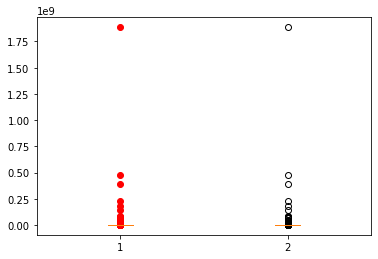

In [5]:
def detect_outliers_iqr(ds, iqr_factor=1.5):
    q1 = np.percentile(ds, 25, axis=0)
    q3 = np.percentile(ds, 75, axis=0)
    iqr = q3 - q1
    upper_bound = q3 + iqr_factor * iqr
    lower_bound = q1 - iqr_factor * iqr
    outliers = np.concatenate([ds[(ds > upper_bound) | (ds < lower_bound)]])
    return outliers


outliers = detect_outliers_iqr(ds)

fig, ax = plt.subplots()
ax.boxplot(ds)
ax.plot(np.ones_like(outliers), outliers, 'ro')
plt.show()

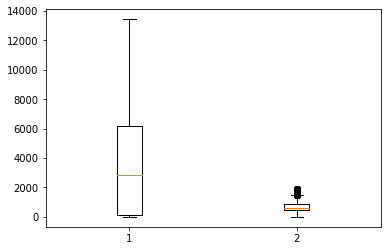

In [6]:
def remove_outliers_iqr(ds, iqr_factor=1.5):
    q1 = np.percentile(ds, 25, axis=0)
    q3 = np.percentile(ds, 75, axis=0)
    iqr = q3 - q1
    upper_bound = q3 + iqr_factor * iqr
    lower_bound = q1 - iqr_factor * iqr
    mask = np.all((ds > lower_bound) & (ds < upper_bound), axis=1)
    cleaned_ds = ds[mask]
    return cleaned_ds

# Remove outliers using IQR
cleaned_ds = remove_outliers_iqr(ds)

# Plot the cleaned ds using a box plot
fig, ax = plt.subplots()
ax.boxplot(cleaned_ds)
plt.show()

In [33]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers


ds = ds[(ds['PRODUCT_LENGTH'] > ds['PRODUCT_LENGTH'].quantile(0.10)) &
            (ds['PRODUCT_LENGTH'] < ds['PRODUCT_LENGTH'].quantile(0.90))]


X_train, X_test, y_train, y_test = train_test_split(ds.drop('PRODUCT_LENGTH', axis=1),ds['PRODUCT_LENGTH'], test_size=0.2,random_state=42)
                                                   
                                                    
                                                    



rb_scaler = RobustScaler()


X_train_rb = rb_scaler.fit_transform(X_train)
X_test_rb = rb_scaler.transform(X_test)



# Define the DNN model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Train the model for 10 epochs
model.fit(X_train_rb, y_train, epochs=20, validation_data=(X_test_rb, y_test))


Epoch 1/20
4072/4072 [==============================] - 6s 1ms/step - loss: 5993.9038 - mae: 34.1111 - val_loss: 1039.8157 - val_mae: 26.2174
Epoch 2/20
4072/4072 [==============================] - 6s 1ms/step - loss: 954.1112 - mae: 25.9431 - val_loss: 1082.0769 - val_mae: 27.6825
Epoch 3/20
4072/4072 [==============================] - 5s 1ms/step - loss: 954.7050 - mae: 25.9403 - val_loss: 943.3341 - val_mae: 25.3657
Epoch 4/20
4072/4072 [==============================] - 5s 1ms/step - loss: 950.8924 - mae: 25.8876 - val_loss: 887.8152 - val_mae: 25.7907
Epoch 5/20
4072/4072 [==============================] - 5s 1ms/step - loss: 948.8398 - mae: 25.8949 - val_loss: 891.3660 - val_mae: 25.5353
Epoch 6/20
4072/4072 [==============================] - 5s 1ms/step - loss: 945.3743 - mae: 25.8688 - val_loss: 921.1353 - val_mae: 25.6978
Epoch 7/20
4072/4072 [==============================] - 5s 1ms/step - loss: 947.5942 - mae: 25.8636 - val_loss: 892.8305 - val_mae: 25.6700
Epoch 8/20
4072/4

In [34]:
y_pred = model.predict(X_test_rb)


In [35]:
from sklearn import metrics
score = max( 0 , 100*(1-metrics.mean_absolute_percentage_error(y_test,y_pred)))
score

96.27457187479945

In [37]:
ds2=pd.read_csv('test.csv')
ds2.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [41]:
x_test2=ds2['PRODUCT_TYPE_ID']

x_test2=rb_scaler.fit_transform(x_test2.values.reshape(-1,1))
y_pred2=model.predict(x_test2)

In [42]:
y_pred2

array([[688.98395],
       [686.51337],
       [682.60785],
       ...,
       [715.09296],
       [740.8761 ],
       [689.221  ]], dtype=float32)